In [14]:
# The Code written by Ali Babolhaveji @ 5/30/2020


dataPath = "../../data"

In [17]:
import os
import pandas as pd


metaData = os.path.join(dataPath,'train_metadata.csv')
df = pd.DataFrame(os.listdir(os.path.join(dataPath,'video')) , columns=['vid_name'])
pd.read_csv(metaData)

,filename,url,project_id,num_frames,crowd_score,tier1,micro,nano
0,100000.mp4,s3://drivendata-competition-clog-loss/train/10...,M,54,0.000000,True,False,False
1,100001.mp4,s3://drivendata-competition-clog-loss/train/10...,F,48,0.022769,False,False,False
2,100002.mp4,s3://drivendata-competition-clog-loss/train/10...,H,122,0.000000,True,False,False
3,100003.mp4,s3://drivendata-competition-clog-loss/train/10...,E,55,0.000000,True,False,False
4,100004.mp4,s3://drivendata-competition-clog-loss/train/10...,C,56,0.000000,True,False,False
...,...,...,...,...,...,...,...,...
573043,687207.mp4,s3://drivendata-competition-clog-loss/train/68...,G,93,0.000000,True,False,False
573044,687208.mp4,s3://drivendata-competition-clog-loss/train/68...,A,60,0.000000,True,False,False
573045,687209.mp4,s3://drivendata-competition-clog-loss/train/68...,E,49,0.000000,True,False,False
573046,687210.mp4,s3://drivendata-competition-clog-loss/train/68...,D,42,0.151080,False,False,False


In [164]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils


def getFrame( vidcap , sec , image_name ):
        vidcap.set(cv2.CAP_PROP_POS_MSEC, sec * 1000)
        hasFrames,image = vidcap.read()
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image ,hasFrames
    

from_sec = 0
step = 1.

vid = df.iloc[150]['vid_name']
vidcap = cv2.VideoCapture(os.path.join(dataPath,'video',vid))
total_frames = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
frame_size = (int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH)) , int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT )))
fps = vidcap.get(cv2.CAP_PROP_FPS)
Video_len = total_frames / fps
time_stamp = np.linspace(from_sec , Video_len ,int(total_frames / step) )
total_frames,frame_size, fps ,Video_len,time_stamp

sec = 0 
frame_num = 1
img_cv2 , hasframe = getFrame(vidcap ,sec , frame_num)



In [145]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import copy

gray = cv2.cvtColor(img_cv2 , cv2.COLOR_BGR2GRAY)


def plot_func(val ):
    img_cv2 , hasframe = getFrame(vidcap ,sec , frame_num)
    hsv = cv2.cvtColor(img_cv2,cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([100,120,150])
    upper_red = np.array([110,255,255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)
    
#     img = Image.fromarray(img)
#     enhancer  = ImageEnhance.Contrast(img)
#     img = enhancer.enhance(val)
#     enhancer  = ImageEnhance.Brightness(img)
#     img = enhancer.enhance(val_b)
#     img = np.hstack((hsv ,mask1))
    plt.figure(figsize=(10,10))
    plt.imshow(mask1)
    
interact(plot_func, val = widgets.FloatSlider(value=120,
                                               min=0,
                                               max=255,
                                               step=5) )

# newRet, binaryThreshold = cv2.threshold(hsv,127,255,cv2.THRESH_BINARY_INV)
# img_gray = cv2.cvtColor(hsv, cv2.COLOR_BGR2GRAY)

# ret, thresh = cv2.threshold(img_gray,20,255,0)
# contours, heirarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cont_sort = sorted(contours, key=cv2.contourArea, reverse=True)
# cv2.drawContours(img_cv2, cont_sort[1], -1, (0, 255, 0), 2)

ms

interactive(children=(FloatSlider(value=120.0, description='val', max=255.0, step=5.0), Output()), _dom_classe…

[]


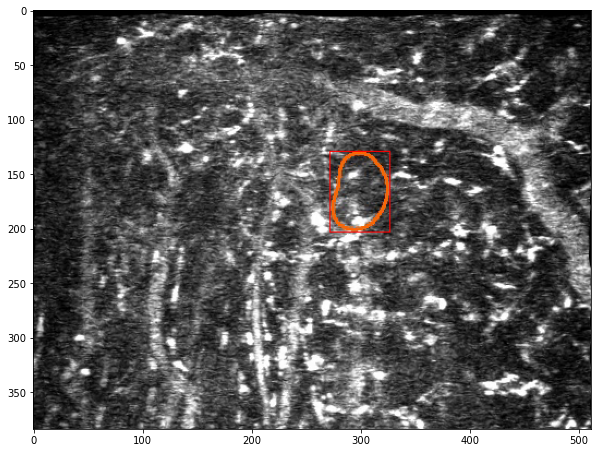

In [171]:
img_cv2 , hasframe = getFrame(vidcap ,sec , frame_num)
hsv = cv2.cvtColor(img_cv2,cv2.COLOR_BGR2HSV)

lower_red = np.array([100,120,150])
upper_red = np.array([110,255,255])
mask1 = cv2.inRange(hsv, lower_red, upper_red)

#     img = Image.fromarray(img)
#     enhancer  = ImageEnhance.Contrast(img)
#     img = enhancer.enhance(val)
#     enhancer  = ImageEnhance.Brightness(img)
#     img = enhancer.enhance(val_b)
#     img = np.hstack((hsv ,mask1))

mask_ind = np.where(mask1>0)
max(mask_ind[0])

xmin , xmax = min(mask_ind[1]) , max(mask_ind[1])
ymin , ymax = min(mask_ind[0]) , max(mask_ind[0])

img_cv2 =  cv2.rectangle(img_cv2 , (xmin,ymin) ,(xmax,ymax),(255,0,0),1,1)

plt.figure(figsize=(10,10))
plt.imshow(img_cv2)

In [ ]:
# img_cv2 = cv2.GaussianBlur(img_cv2, (5, 5), 0)
# img_cv2 = cv2.Canny (img_cv2, 50, 100)
# img_cv2 = cv2.dilate(img_cv2, None, iterations=2)
# img_cv2 = cv2.erode (img_cv2, None, iterations=1)
img_gray = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray,20,255,0)
contours, heirarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cont_sort = sorted(contours, key=cv2.contourArea, reverse=True)
cv2.drawContours(img_cv2, cont_sort[2], -1, (0, 255, 0), 2)
# cv2.drawContours(img_cv2, contours, -1, (127,127,0), 2)

# cnts = cnts[0] if imutils.is_cv2() else cnts[1]
# cnts
# c = max(cnts, key=cv2.contourArea)
hsv = cv2.cvtColor(img_cv2,cv2.COLOR_BGR2HSV)
lower_red = np.array([170,120,70])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(hsv, lower_red, upper_red)

plt.imshow(mask1)